In [ ]:
import numpy as np
import scipy as sp
from scipy import optimize, spatial
from tqdm import tqdm
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import random
import networkx as nx

**RNG**

True
True


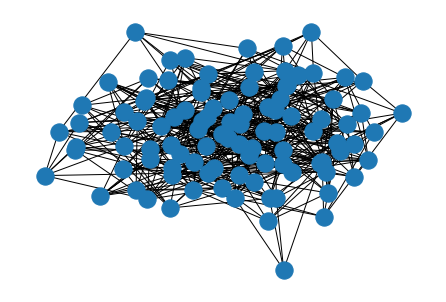

In [ ]:
seed=359
np.random.seed(seed)

n = 100
m = 500

g = nx.gnm_random_graph(n, m, seed=seed)
weights = np.random.randint(100, size=m)
for i, elem in enumerate(g.edges()):
    g[elem[0]][elem[1]]['weight'] = weights[i]
    g[elem[1]][elem[0]]['weight'] = weights[i]
print(np.all(nx.linalg.graphmatrix.adjacency_matrix(g).toarray() == nx.linalg.graphmatrix.adjacency_matrix(g).toarray().T))
print(np.all(nx.linalg.graphmatrix.adjacency_matrix(g).toarray() >= 0))
nx.draw(g)

**Dijkstra's and Bellman-Ford algorithms measurements**

In [ ]:
def avg_runs(experiments, gr, source, dest, fun):
    times = []
    for j in tqdm(range(1, experiments + 1)):
        start_time = timer()
        fun(gr, source, dest, 'weight')
        times.append(timer() - start_time)
            
    return np.array(times, dtype=np.float64).mean(axis=0)

In [ ]:
print('\nMeasured time for Dijkstra {:.7f}'.format(avg_runs(10, g, 3, 98,
    nx.algorithms.shortest_paths.weighted.dijkstra_path)))
print('\nMeasured time for Bellman-Ford {:.7f}'.format(avg_runs(10, g, 3, 98,
    nx.algorithms.shortest_paths.weighted.bellman_ford_path)))

100%|██████████| 10/10 [00:00<00:00, 983.52it/s]



Measured time for Dijkstra 0.0006777


100%|██████████| 10/10 [00:00<00:00, 318.67it/s]


Measured time for Bellman-Ford 0.0030755


**Grid with obstacles**

path from (2, 11) to (1, 1):
[(2, 11), (3, 11), (3, 10), (3, 9), (4, 9), (4, 8), (4, 7), (4, 6), (4, 5), (4, 4), (3, 4), (2, 4), (1, 4), (1, 3), (1, 2), (1, 1)]
Run time:  0.0010401890003777226 

path from (3, 0) to (8, 5):
[(3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (6, 2), (7, 2), (8, 2), (8, 3), (8, 4), (8, 5)]
Run time:  0.0007426199999827077 

path from (2, 5) to (6, 13):
[(2, 5), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13)]
Run time:  0.0012874750000264612 

path from (0, 6) to (5, 4):
[(0, 6), (1, 6), (1, 5), (2, 5), (2, 4), (3, 4), (4, 4), (5, 4)]
Run time:  0.00030810200041742064 

path from (6, 3) to (4, 19):
[(6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (5, 11), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (5, 17), (5, 18), (5, 19), (4, 19)]
Run time:  0.0019144379994031624 



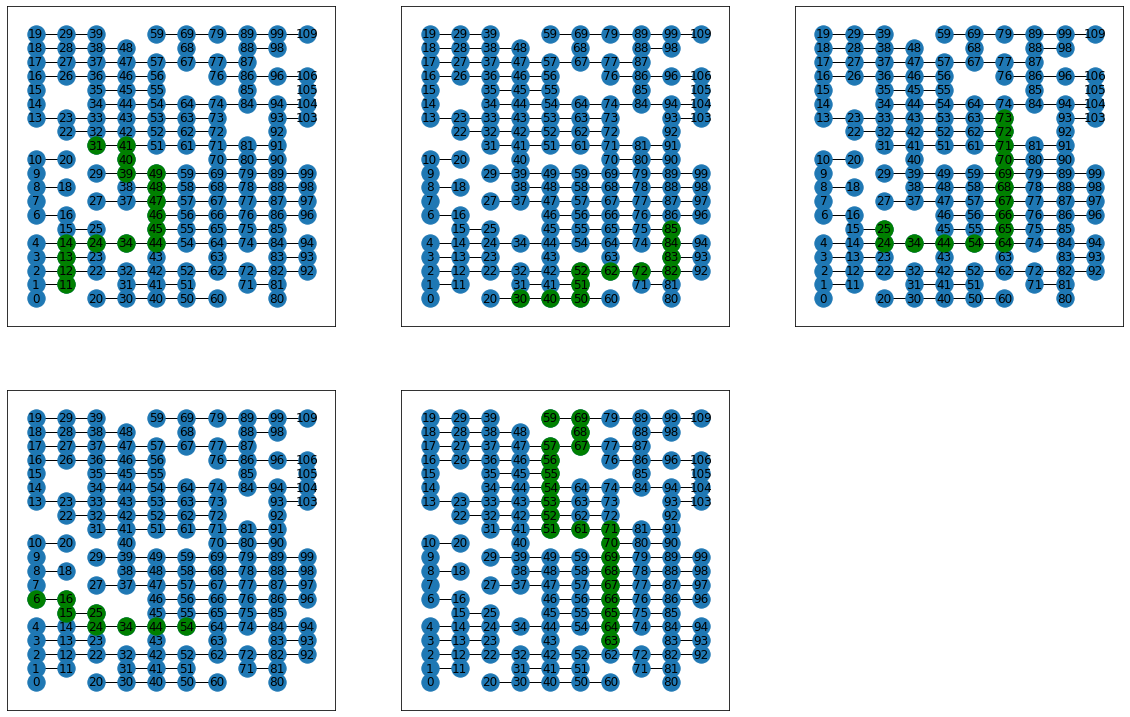

In [ ]:
fig = plt.figure(figsize=(20, 20))

n = 10
m = 20
obstacles = 40
experiments = 5

grid = nx.grid_2d_graph(n, m)

possible_coordinates = [(x, y) for x in range(n) for y in range(m)]
bomb_coordinates = random.sample(possible_coordinates, obstacles)

obstacle_edges = list(map(tuple, bomb_coordinates))

grid.remove_nodes_from(obstacle_edges)
pos = dict((n, n) for n in grid.nodes())
labels = dict(((i, j), i * 10 + j) for i, j in grid.nodes())

times = []
for i in range(experiments):
    subplot = 331 + i

    start_node = random.choice(list(grid.nodes()))
    end_node = random.choice(list(grid.nodes()))

    print(f'path from {start_node} to {end_node}:')

    start_time = timer()

    path = nx.algorithms.shortest_paths.astar.astar_path(
        grid, start_node, end_node)
    
    times.append(timer() - start_time)
    
    ax = fig.add_subplot(subplot)
    nx.draw_networkx(grid, pos=pos, labels=labels)
    nx.draw_networkx_nodes(grid, pos, nodelist=path, node_color='green')

    print(path)
    print("Run time: ", np.float64(times[i]), "\n")
